<a href="https://colab.research.google.com/github/Elhameed/Data-Preprocessing-Machine-Learning-Pipeline-/blob/main/ml_pipeline_%5BAbdulhameed_Teniola_Ajani%5D_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing Approach for Portfolio Project

## Project Title: Speech Emotion Recognition
## 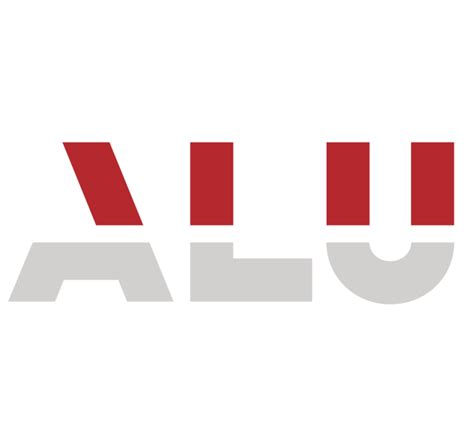

## Student Name: Abdulhameed Teniola Ajani

---

1. **Data Sources and Aggregation:**
   - List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)

   **The primary dataset for this project is the RAVDESS dataset (https://www.kaggle.com/datasets/uw-madison/ravdess-emotional-speech-audio). This dataset contains 1440 audio files, representing emotions like happy, sad, angry, fearful, surprised, disgust, calm, and neutral, recorded by professional actors. **

   **Additional Source:** The CREMA-D dataset (https://github.com/CheyneyComputerScience/CREMA-D) is another widely used emotional speech dataset with 7,442 audio files from 91 actors. It complements RAVDESS by offering additional variability in accents and pronunciations, which could improve model generalization. However, for this project, the RAVDESS dataset alone is sufficient for achieving the outlined objectives, so data aggregation is not necessary.

   
   - Determine if data aggregation from multiple sources is necessary for comprehensive analysis.

    **This dataset is sufficient for the scope of this project, so there's no need to aggregate additional sources.
 **



In [2]:
import os
import shutil

# Define the source path where the Actor folders are located
source_path = '/content'
# Define the target path where you want to create emotion folders
target_path = '/content/emotions'

# Create target directory if it doesn't exist
if not os.path.exists(target_path):
    os.makedirs(target_path)

# Define the emotion mapping based on file naming convention
emotion_map = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised',
}

# Iterate through the Actor folders and move files
for actor in range(1, 5):  # For Actor_01 to Actor_04
    actor_folder = f'Actor_{actor:02d}'
    actor_path = os.path.join(source_path, actor_folder)

    for file_name in os.listdir(actor_path):
        if file_name.endswith('.wav'):
            # Extract emotion code from filename (e.g., "03" for sad)
            emotion_code = file_name.split('-')[2]  # Part 3 of filename
            emotion = emotion_map[emotion_code]  # Map to emotion name

            # Create emotion folder if it doesn't exist
            emotion_folder = os.path.join(target_path, emotion)
            if not os.path.exists(emotion_folder):
                os.makedirs(emotion_folder)

            # Move file to the corresponding emotion folder
            shutil.move(os.path.join(actor_path, file_name), os.path.join(emotion_folder, file_name))

print("Dataset reorganized into emotion folders.")

Dataset reorganized into emotion folders.




2. **Data Format Transformation:**
   - Describe the current format of the data.
   - Outline the planned transformation to a unified format suitable for analysis and modeling.

 **The RAVDESS dataset is stored as .wav audio files, organized in folders by actors. The files were reorganized into folders representing each emotion for easier processing. After reorganizing, I processed each audio file by loading it using the librosa library, then generating spectrograms to represent the audio data as 2D arrays. Each spectrogram was resized to a 64x64 resolution to standardize input dimensions for the Convolutional Neural Network (CNN).
 **

3. **Data Exploration:**
   - Enumerate the features included in the dataset.
   
   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.

   ** **Features:** The primary features are the spectrograms derived from the audio data, which serve as a visual representation of the sound frequencies over time.

   **Exploration:** Basic data exploration includes visualization of spectrograms, checking the shape of the arrays, and label distribution to ensure balanced classes.
 **
   
  **Insert code for data exploration below**


In [4]:
# Describe the current data format ( .wav ) and transformation process
import librosa
import numpy as np
import os
from skimage.transform import resize

# Function to load audio and convert to spectrogram
def load_audio_files(data_path):
    spectrograms = []
    labels = []
    emotion_mapping = {
        'neutral': 0,
        'calm': 1,
        'happy': 2,
        'sad': 3,
        'angry': 4,
        'fearful': 5,
        'disgust': 6,
        'surprised': 7
    }

    # Iterate over each emotion folder
    for emotion_folder in os.listdir(data_path):
        emotion_path = os.path.join(data_path, emotion_folder)
        if os.path.isdir(emotion_path):
            emotion_label = emotion_mapping[emotion_folder]  # Get the emotion label

            for file_name in os.listdir(emotion_path):
                if file_name.endswith('.wav'):
                    file_path = os.path.join(emotion_path, file_name)
                    # Load audio
                    audio, sr = librosa.load(file_path, sr=48000)
                    # Convert to spectrogram (STFT)
                    spect = librosa.stft(audio)
                    spect_db = librosa.amplitude_to_db(abs(spect))
                    # Resize spectrogram to 64x64
                    spect_resized = resize(spect_db, (64, 64), anti_aliasing=True)
                    spectrograms.append(spect_resized)
                    labels.append(emotion_label)  # Append the emotion label

    return np.array(spectrograms), np.array(labels)

# Example usage
data_path = '/content/emotions'
spectrograms, labels = load_audio_files(data_path)

# Check the shapes of the arrays
print(f'Shape of spectrograms: {spectrograms.shape}')
print(f'Shape of labels: {labels.shape}')


Shape of spectrograms: (240, 64, 64)
Shape of labels: (240,)


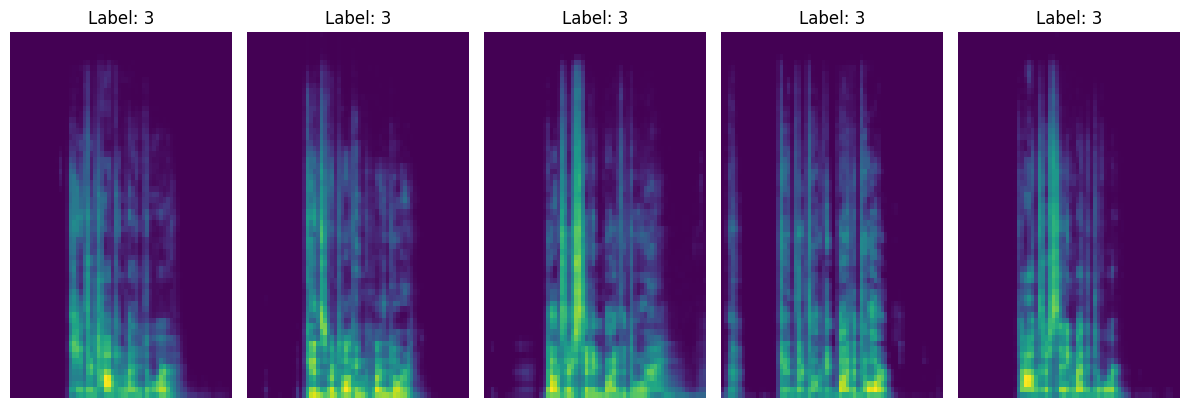

In [17]:
#Include plots for EDA

import matplotlib.pyplot as plt

# Visualizing some spectrograms
plt.figure(figsize=(12, 8))
for i in range(5):  # Plot the first 5 spectrograms
    plt.subplot(2, 5, i + 1)
    plt.imshow(spectrograms[i], aspect='auto', origin='lower')
    plt.title(f'Label: {labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()



4. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.
   - Explain methodologies to empirically test these hypotheses.

   ** **Hypothesis:** Emotional states such as "angry" or "sad" are expected to show distinct spectrogram patterns due to different voice frequencies.

   **Testing:** The CNN model will be trained to predict emotions from spectrograms, and its performance will be evaluated using metrics like accuracy, confusion matrix to analyze its performance in distinguishing between emotions. **

5. **Handling Sparse/Dense Data and Outliers:**
   - Assess the density of the data.
   - Propose strategies to handle missing data and outliers while maintaining dataset integrity.

   ** **Sparsity:** The data is dense since every audio file provides a rich source of information for each emotion with each spectrogram being a 64x64 image. There are no missing files within the selected subset (Actor_01 to Actor_04).

   **Outliers:** Given that each audio file is verified, outliers in terms of data points are not expected. However, feature normalization is applied during preprocessing.
 **

   **Insert code for Handling Sparse/Dense Data and Outliers below**

In [6]:
# Handling outliers by normalizing the data
spectrograms = spectrograms.astype('float32')
spectrograms = (spectrograms - np.mean(spectrograms)) / np.std(spectrograms)


6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.
   - Ensure randomness and representativeness in each subset.

    **The dataset is split into training, validation, and test sets using train_test_split. The training set contains 70%, the validation set 15%, and the test set 15% of the data. This ensures randomness and balanced representation of all emotion classes in each set. **

7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.
   
    **Balanced Classes: Each emotion is represented equally by selecting audio files from the specified actors, ensuring balanced class representation for training, validation, and testing. **



In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(spectrograms, labels, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

# Check the shapes of the split datasets
print(f'Train set shape: {X_train.shape}, Labels shape: {y_train.shape}')
print(f'Validation set shape: {X_val.shape}, Labels shape: {y_val.shape}')
print(f'Test set shape: {X_test.shape}, Labels shape: {y_test.shape}')

Train set shape: (168, 64, 64), Labels shape: (168,)
Validation set shape: (36, 64, 64), Labels shape: (36,)
Test set shape: (36, 64, 64), Labels shape: (36,)


8. **Features for Model Training:**
   - Identify relevant features for training the model.
   - Rank features based on their significance to project objectives.

  ** The primary feature used for model training is the spectrogram, representing a 2D transformation of the audio signal.

  The spectogram is the most significant feature because it captures the full range of time-frequency characteristics of speech, which is crucial for distinguishing between various emotional states.
  
  Another feature is **pitch** which is for identifying emotional tone and intensity, as different emotions often manifest with varying pitch levels.
  
  Temporal features such as speech duration may also be relevant but are not utilized in this model.**
   
9. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.) present in the dataset.
   - Plan preprocessing steps for each data type.

   *Categorical data: Emotion labels (e.g., neutral, happy, sad) are categorical, and one-hot encoding is used for labels.
   Numerical data: Spectrogram pixel values are numeric and are scaled and normalized for model input.*


In [10]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding for preprocessing
y_train_one_hot = to_categorical(y_train, num_classes=8)
y_val_one_hot = to_categorical(y_val, num_classes=8)
y_test_one_hot = to_categorical(y_test, num_classes=8)



10. **Data Transformation for Modeling:**
    - Specify methods for transforming raw data into a model-friendly format.
    - Detail steps for normalization, scaling, or encoding categorical variables.

11. **Data Storage:**
    - Determine where and how processed data will be stored.
    - Choose suitable storage solutions ensuring accessibility and security.

---
**Data Transformation for Modeling:**

- **Methods for transforming raw data into a model-friendly format:**
    - **Loading the audio files:** I used librosa to load .wav files and convert them into numerical arrays for further processing.
    - **Feature extraction:** The raw audio files are converted into spectrograms, which are 2D representations of the sound. Specifically, I used Short-Time Fourier Transform (STFT) to extract the frequency components of the audio. This helps in understanding the patterns in the audio data related to speech emotions.
    - **Resizing the spectrograms:** I resized the extracted spectrograms to a consistent size (64x64) using skimage.transform.resize to ensure they can be inputted into the Convolutional Neural Network (CNN). The resizing is crucial because the CNN requires fixed-size input images.
    - **Normalization:** I standardized the spectrograms by subtracting the mean and dividing by the standard deviation. This helps in speeding up training and improving model performance by ensuring that the features are on the same scale.
    - **Data split:** The data is split into training, validation, and test sets using train_test_split from sklearn. This allows for efficient model evaluation and helps in preventing overfitting.
- **Steps for normalization, scaling, or encoding categorical variables:**
    - **Normalization/Scaling:** The spectrograms are normalized using standardization, where the mean of the training data is subtracted and then divided by the standard deviation.
    - **Encoding categorical variables:** The labels (emotions) are one-hot encoded using to_categorical from Keras. This ensures that the model can handle categorical outputs (emotions) and predict the likelihood of each emotion.


**Data Storage:**
- **Where and how processed data will be stored:**
    - **Data Storage during Processing:** The processed audio files (in the form of spectrograms) are stored in memory (in spectrograms and labels arrays). These are NumPy arrays, which are easy to manipulate and feed into the model. The training, validation, and test sets are stored in separate arrays for efficient access during model training and evaluation.
    - **Persisting the trained model:** After training the models, the trained model is saved to disk using model.save('vanilla_model.keras').
- **Choose suitable storage solutions ensuring accessibility and security:**
    - For local development and testing, I stored the processed data in local directories and saved the model in the working directory. This ensures that I can easily access the data during the model training phase.
---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.

In [11]:
from skimage.transform import resize

# Function to resize spectrograms to 64x64
def resize_spectrograms(spectrograms, target_size=(64, 64)):
    resized = []
    for spec in spectrograms:
        resized_spec = resize(spec, target_size, anti_aliasing=True)
        resized.append(resized_spec)
    return np.array(resized)
